<a href="https://colab.research.google.com/github/ashwinamrutphale/aml-homeworks/blob/master/homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import nltk
from sklearn.feature_extraction import stop_words
from sklearn.neighbors import NearestNeighbors




In [0]:
input_df = pd.read_csv('http://courses.engr.illinois.edu/cs498aml/sp2019/homeworks/yelp_2k.csv')


In [0]:
class Vector:
  def __init__(self,vector,bag_of_words):
    self.vector = vector
    self.bag_of_words = bag_of_words
    
def plot(bag_of_words):
  sum_words = bag_of_words.sum(axis=0) 
  f = np.sort(sum_words)
  y = np.squeeze(np.asarray(f[0:1,::-1]))
  x_coordinate = [i for i in range(len(y))]
  plt.scatter(x_coordinate, y)
  plt.show()

def get_stop_words_plot(data):
  vectorizer =CountVectorizer()
  bag_of_words = vectorizer.fit_transform(data)
  stop_word = []
  plot(bag_of_words)
  for word in stop_words.ENGLISH_STOP_WORDS:
    if word in vectorizer.vocabulary_:
      stop_word.append(word)
  return stop_word
    

def get_final_bfw(data,stop_words,min_df,max_df):
  vectorizer = CountVectorizer(stop_words=stop_words,max_df=max_df, min_df=min_df)
  bag_of_words = vectorizer.fit_transform(data)
  plot(bag_of_words)
  return Vector(vectorizer,bag_of_words)

def get_nearest_neighbors(data,vector,point,n):
  neigh = NearestNeighbors(n_neighbors=n)
  neigh.fit(vector.bag_of_words)
  x = v.vector.transform(point)
  r = neigh.kneighbors(x, return_distance=True) 
  return data.iloc[r[1][0]],r[0]
  
  
  
 


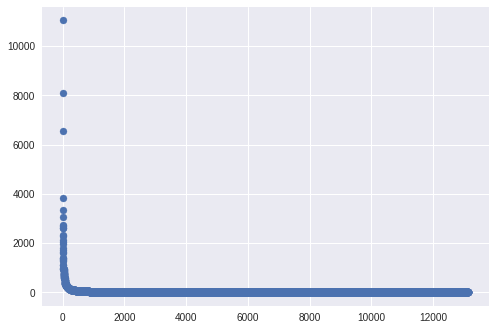

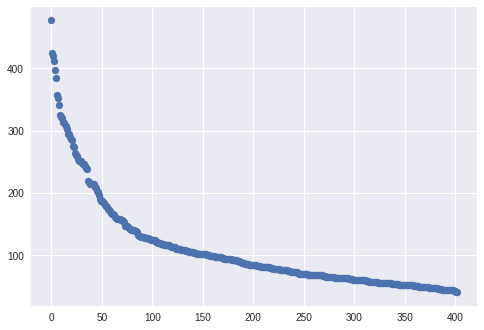

(                   review_id                 user_id             business_id  \
 581   2LfLK_N-phmub7tpVu5Zqw  jVHNHKzPox0VApUS4DXPwg  7fdg1_YtLZcIpP3oWXvQBg   
 1213  IV9A9j8FUGGD6BXEzCn-VQ  MUJ9E6mHpdJvHI1G82ypow  FXNa72JCrnGx1wMKw7LAew   
 198   9UGMPapU9pV8Z3e3_7W1gg  gR6QY5A9rYO1A5_ihPUiYg  dRK_RhhF23sDIYzqbobD0Q   
 1335  6ShR5SSGfR_XrTORzCUkKQ  on59XgfWL87F7vrSR5FuNA  u3h41mmJ30NgURHf6ik_ag   
 1043  nkJAg3udCbQfdfXjdTaLmw  jT9XoMFZqaXygTzmcbvo-g  NMw6zTXoZDEzNchVIfL1pQ   
 
       stars        date                                               text  \
 581       1  2016-02-27  This attorney is the stereotype of attorneys. ...   
 1213      1  2011-10-03  Nun griechisch, ja! Nett nein, und gutes essen...   
 198       1  2014-04-17  Je vous déconseille fortement cette place !! I...   
 1335      1  2016-06-09  Horrible attorney.  Defend yourself before hir...   
 1043      5  2016-07-16  For NC the food was good. Try the carnitas de ...   
 
       useful  funny  cool  
 581   

In [61]:
words = get_stop_words_plot(input_df["text"])
v = get_final_bfw(input_df["text"],words,40,400)
# x = v.vector.transform(["Horrible customer service"])
get_nearest_neighbors(input_df,v,["Horrible customer service"],5)
